##### 사용할 패키지/라이브러리 목록

In [1]:
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random

##### 훈련용 데이터와 시험용 데이터 이미지 크기 조정 (28 X 28)

In [9]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize((28, 28), Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "image resized") 

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

635 image resized
601 image resized
600 image resized
102 image resized
101 image resized
105 image resized


##### 훈련용 데이터와 시험용 데이터 로드 (라벨링)

In [10]:
def load_data(img_path, number_of_data):
    imgs = np.zeros(number_of_data * 28 * 28 * 3, dtype = np.int32).reshape(number_of_data, 28, 28, 3)
    labels = np.zeros(number_of_data, dtype = np.int32)
    # 이미지 matrix와 라벨(가위, 바위, 보를 담을 그릇) 배열을 생성

    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32) # img에 이미지 할당
        imgs[idx, :, :, :] = img # imgs 배열에 img(=오픈한 이미지) 할당
        labels[idx] = 0 # 라벨링, 가위 : 0
        idx += 1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1 # 라벨링, 바위 : 1
        idx += 1  
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2 # 라벨링, 보 : 2
        idx += 1
        
    print(idx, "loaded")
    return imgs, labels

# train data load
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path, 1836)
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# test data load
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path, 308)
x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

1836 loaded
x_train shape: (1836, 28, 28, 3)
y_train shape: (1836,)
308 loaded
x_test shape: (308, 28, 28, 3)
y_test shape: (308,)


train data
label : 2


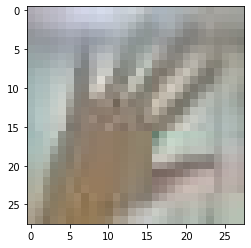

In [11]:
# train data 미리보기
print("train data")
plt.imshow(x_train[1800])
print('label :', y_train[1800])

test data
label : 0


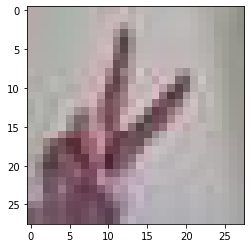

In [12]:
# test data 미리보기
print("test data")
plt.imshow(x_test[100])
print('label :', y_test[100])

##### 딥러닝 네트워크 설계

In [16]:
model = keras.models.Sequential() # generating sequential model of keras
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,3))) # add node 
# feature channel : 16 / kernel size : 3x3 / input_shape : 28 x 28, color
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
# feature channel : 16 / kernel size : 3x3
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu')) # dense units : 64
model.add(keras.layers.Dense(3, activation = 'softmax')) # class : 3 (가위, 바위, 보)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

##### 딥러닝 네트워크 학습

In [14]:
x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 3) # 크기 조정 생략 가능
x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 3) # 크기 조정 생략 가능

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
58/58 [==============================] - 0s 3ms/step - loss: 1.0390 - accuracy: 0.4940
Epoch 2/10
58/58 [==============================] - 0s 3ms/step - loss: 0.7418 - accuracy: 0.7075
Epoch 3/10
58/58 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8644
Epoch 4/10
58/58 [==============================] - 0s 3ms/step - loss: 0.2183 - accuracy: 0.9472
Epoch 5/10
58/58 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9651
Epoch 6/10
58/58 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9869
Epoch 7/10
58/58 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9869
Epoch 8/10
58/58 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9940
Epoch 9/10
58/58 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 10/10
58/58 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9989


##### 시험용 데이터로 테스트 및 잘못된 결과 확인

10/10 - 0s - loss: 1.9076 - accuracy: 0.6364
실제: 2, 예측: 1


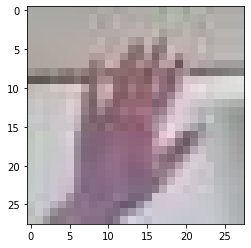

실제: 2, 예측: 0


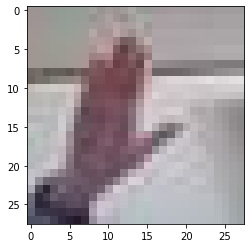

실제: 2, 예측: 1


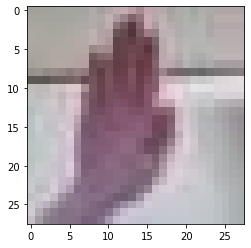

실제: 0, 예측: 2


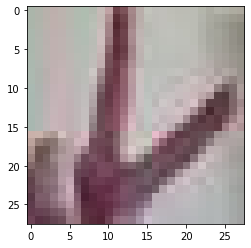

실제: 0, 예측: 2


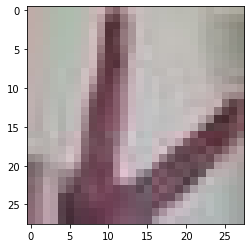

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis=1)

# 잘못 예측한 데이터 눈으로 확인하기
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=5) # wrong predict list 임의 추출한 5개

for n in samples:
    print("실제: " + str(y_test[n]) + ", 예측: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap = plt.cm.binary)
    plt.show()

<br />

#### 회고
<br/>
#### 학습 내용
<br/>
<br/>
- 교차 검증 <br/>
<br/>
교차 검증이란 훈련용 데이터(train data), 검증용 데이터(validation data), 시험용 데이터(test data)가 있을 때, 훈련용 데이터와 검증용 데이터를 바꿔가며 결과를 내보는 기법이다. 훈련용 데이터와 검증용 데이터를 바꿔가며 여러 번 결과를 내보고 여러 번의 결과의 평균을 모델의 성능으로 삼는다. <br/>
<br/>
[교차검증 (Cross-Validation), 슬기로운데이터생활, JINYOUNG SUL, (22.01.05)] (https://jinyoungsul.github.io/pandas/sklearn/Cross-Validation/)
<br/>
<br/>
<br/>
- ANTIALIAS <br/>
<br/>
ANTIALIAS란 한국어로 위신호 제거라는 뜻이다. 이번 프로젝트는 데이터 이미지의 크기를 28X28로 축소하는데, 이때 이미지가 깨지는 현상을 최소화하는 방법으로 Image.ANTIALIAS를 사용한다.<br/>
<br/>
```
# 코드 예시
old_img = Image.open("file")
new_img = old_img.resize((width, height), Image.ANTIALIAS)
```
<br/>
[Python PIL Pillow 라이브러리를 활용하여 이미지 resize 시 깨지지 않게 저장하는 방법, 솜씨좋은장씨, (22.01.05)] (https://somjang.tistory.com/entry/Python-PILPillow-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-resize-%EC%8B%9C-%EA%B9%A8%EC%A7%80%EC%A7%80-%EC%95%8A%EA%B2%8C-%EC%A0%80%EC%9E%A5%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95)
<br/>
<br/>
<br/>
- Syntax Error <br/>
<br/>
positional argument follows keyword argument라고 뜨면 함수의 매개변수를 잘못 사용하고 있을 수 있다. 함수 사용이 익숙하지 않아 오타를 발견하기 어려웠다. <br/>
<br/>
```
# 코드 예시
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape(28,28,3))) # (X)
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,3))) # (O)
```
<br/>
<br/>
<br/>
- 폴더 내 파일 이름 일괄 변경 <br/>
<br/>
데이터를 사용할 때 구조적으로 한 폴더에 데이터를 담아야하는 경우라면 폴더 내 파일의 이름을 바꿀 필요가 있다. 데이터가 수백개라면 하나하나 바꿀 수 는 없다. 이때, 파이썬 코드를 사용하여 바꿀 수 있다. <br/>
<br/>
<br/>
<br/>
- Cannot reshape array of size xxxxxx into shape (xx, xx, x) <br/>
<br/>
이번 프로젝트는 사이즈를 변수에 담아 재사용하지 않고, 함수마다 직접 실수를 넣어 사용한다. 따라서 이미지의 크기를 바꿔야 할 필요가 있을 때 
모두 바꿔주어야 하기 때문에 상당히 번거롭다. 또한, 실수로 크기를 다 맞춰주지 않았을 때 위와 같은 에러를 만날 수 있다. 큰 프로젝트에서는 같은 실수를 반복하지 않도록 애초에 변수에 담아서 사용하는 것이 좋겠다. <br/>
<br/>
<br/>
<br/>
- 메모리 부족 <br/>
<br/>
<span style = "color:red">
_InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized._
</span>
<br/>
<span style = "color:red"> _ResourceExhaustedError_ </span>
<br/>
<br/>
다음과 같은 에러메시지는 텐서플로우 메모리 부족이다. 아래 블로그를 참고했다. <br/>
<br/>
[파이썬 tensorflow - Dst tensor is not initialized. 오류 메시지, 성태의 닷넷 이야기, 정성태, (22.01.05)] 
(https://www.sysnet.pe.kr/2/0/12824)
<br/>
<br/>
우선, 아래 글을 따라서 초기화해보는 방법이 있다. <br/>
<br/>
[Solved-TensorFlow Error:InternalError:Failed copying input tensor, debugah, (22.01.05)] (https://debugah.com/%E3%80%90tensorflow%E3%80%91internalerror-failed-copying-input-tensor-21264/)
<br/>
<br/>
나의 경우는 이 방법을 시도했지만 해결되지 않았다. 따라서, GPU의 Memory Usage를 확인했다. 아이펠 클라우드를 사용하는 경우 아래 쉘 명령어로 memory usage를 사용할 수 있다. <br/>
<br/>
```
$ nvidia-msi
```
<br/>
memory usage가 거의 다 찼다면 우선, 사용하지 않는 주피터 노트북을 shut down하고 다시 확인한다. memory usage가 여유가 생기는 것을 볼 수 있다. 나는 LMS를 로그아웃하고 재접속함으로써 초기화를 시켜 이를 해결할 수 있었다. <br/>
텐서플로우의 특징으로 모델을 수정한다고 해서 바로 휘발되지 않는다. 따라서 모델을 반복적으로 수정, 재학습 시킬 경우 이전 모델을 계속 기억하고 있기 때문에 GPU의 과부하가 생길 수 있다. <br/>
<br/>
<br/>
<br/>
#### 사족
<br/>
<br/>
*어찌저찌 코드를 완성했을 때, 정확도(test accuracy)가 너무 낮아서 이를 60%까지 끌어올리는데 많은 시간이 걸렸다.* <br/>
*정확도를 올리기 위해 세가지 방법을 사용했다.* <br/>
<br/>
*첫번째, 하이퍼파라미터 (코드) 변경* <br/>
*layer 수, 입력 이미지의 특징 수, epoch를 계속 바꾸어봤지만 영향이 미비했다.* <br/>
*단순히 이런 것들을 늘린다고 해결이 되지 않으며, 인수를 키웠을 때 그것들이 어떤 영향을 미치는 지도 잘 모르겠다.* <br/>
*즉, 정확도와 유의미한 상관관계를 보지 못했다.* <br/>
*소폭 상승했다가 훅 떨어지는 정확도를 보며 내 잔고 같기도 해서 안타까운 마음이 들었다.* <br/>
*코드에 잘못된 부분이 있나 싶어 코드를 보고 또 보기도 했다.* <br/>
<br/>
*두번째, 이미지(데이터) 크기 변경* <br/>
*사용하는 이미지의 크기가 작은 탓인가 싶어서 28x28에서 168x168까지 키웠는데 정확성에서 큰 차이가 없었다.* <br/>
<br/>
*세번째, 데이터 전처리(그냥 데이터를 다시 수집했다).* <br/>
*결국은 훈련용 데이터를 재구축했다.* <br/>
*데이터의 양을 100 x 3 = 300장에서 600 X 3 = 1800장으로 늘리고 조금 더 가위, 바위, 보가 명확하게 보이도록 재촬영했다.* <br/>
*테스트 데이터도 조원들의 여러 데이터 중 명확한 데이터를 사용했다.* <br/>
*가위, 바위, 보를 하고 있는 손이 가까이에서 찍혔거나 크게 나온 이미지를 위주로 사용했다.* <br/>
*손이 작게 나왔더라도, 흰 배경을 바탕에 깔고 있는 등 손이 명확하게 보이는 이미지라면 편집해서 사용이 가능했다.* <br/>
*아마 데이터 전처리가 중요한 이유가 이런 것이지 않나 싶다.* <br/>
<br/>
<br/>
*메모리 에러를 겪었다.* <br/>
*너무 반복적으로 모델을 생성한 탓일까, 어느 순간 메모리가 꽉 찼다는 internal error를 보았다.* <br/>
*나름대로 구글링을 해서 tensorflow keras 초기화를 했는데 그때부터는 resource exhausted error가 떴다.* <br/>
*결국 퍼실님께 도움을 구해서 재접속 초기화함으로써 해결했다.* <br/>
*tensorflow는 모델을 저장하기 때문에 초기화 하기 전에는 수정하더라도 이전 모델이 남아있다고 한다.* <br/>
<br/>
<br/>
*tensorflow를 처음 사용했다.* <br/>
*이론적으로만 알던 인공신경망이었는데 직접 다루어보니 시스템적으로 이해를 한 것 같다.*
*다음엔 더 깊고 넓은 지식으로 훨씬 더 뛰어난 결과물을 내고싶다는 생각이 든다.*
<br/>